# TITLE GO HERE

### INTRODUCTION

(Rest of the introduction go here)

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
options(repr.matrix.max.rows = 6)

### Also set the seed
set.seed(2022)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### PRELIMINARY EXPLORATORY DATA ANALYSIS

For the project, we will use the data from Heart Disease Cleveland UCI dataset ([Kaggle link to dataset](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?resource=download)). The data set has 14 columns, and contains the following information (according to the website):
1. **age**: Patient's age in years.
2. **sex**: Patient's sex. 1 = male and 0 = female.
3. **cp**: Patient's chest pain type:
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic
4. **trestbps**: Patient's resting blood pressure (in mmHg on admission to the hospital).
5. **chol**: Patient's serum cholesterol in mg/dl.
6. **fbs**: Patient's fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
7. **restecg**: Patient's resting electrocardiographic results:
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: Patient's maximum heart rate achieved.
9. **exang**: Patient has exercise induced angina (1 = yes; 0 = no).
10. **oldpeak** : ST depression induced by exercise relative to rest.
11. **slope**: The slope of the peak exercise ST segment.
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
12. **ca**: Number of major vessels (0-3) colored by flourosopy.
13. **thal**: Thalassemia:
    - Value 0: normal
    - Value 1: fixed defect
    - Value 2: reversable defect
14. **condition**: Patient has heart disease (0 = no disease, 1 = disease).

For our preliminary data analysis, we will start by loading the data onto this notebook:

In [2]:
heart_cleveland_data <- read_csv("https://raw.githubusercontent.com/soph-ien/dsci_100_group143_project/main/heart_cleveland_upload.csv") |> 
                        mutate(across(c(sex:cp, fbs:restecg, exang, slope:condition), as_factor))
heart_cleveland_data

Rows: 297 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [18]:
heart_cleveland_data_filter <- filter(heart_cleveland_data, condition == 1)
heart_cleveland_data_filter

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
59,1,0,170,288,0,2,159,0,0.2,1,0,2,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [19]:
heart_split <- initial_split(heart_cleveland_data_filter, prop = 0.75, strata = cp)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

Now that we got our training data, we can begin some exploratory data analysis. First we will see what's the proportion of each chest pain type in our training data:

In [20]:
heart_proportion_train <- heart_train |> group_by(cp) |> summarize(n=n()) |> mutate(percent = 100*n/nrow(heart_train))

heart_proportion_train

cp,n,percent
<fct>,<int>,<dbl>
0,4,3.921569
1,8,7.843137
2,13,12.745098
3,77,75.490196


So it seems that there's around 9.46% chest pain of type 0 (typical angina), 15.77% chest pain of type 1 (atypical angina), 27.48% chest pain of type 2 (non-anginal pain) and finally 47.29% chest pain of type 3 (asymptomic). Next, we want to know if there's any missing values in our training data:

In [21]:
heart_missing_data_train <- as_tibble(apply(heart_train, 2, is.na)) |> map_df(sum)
heart_missing_data_train

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0


There are no missing values in our training data, which means we don't need to do any additional work to remove them. Lastly, we will see the distribution resting blood pressure (trestpbs) in terms of the number of patients for each chest pain type. To do so, we create a table containing all the relevant columns:

In [22]:
heart_train_cp <- heart_train |> select(cp, trestbps)
heart_train_cp

cp,trestbps
<fct>,<dbl>
0,134
0,170
0,120
⋮,⋮
3,110
3,118
3,126


Then we create a histogram for each type of chest pain, and in each histogram, we show the distribution of resting blood pressure (trestbps) on the x-axis and the number of patients on the y-axis:

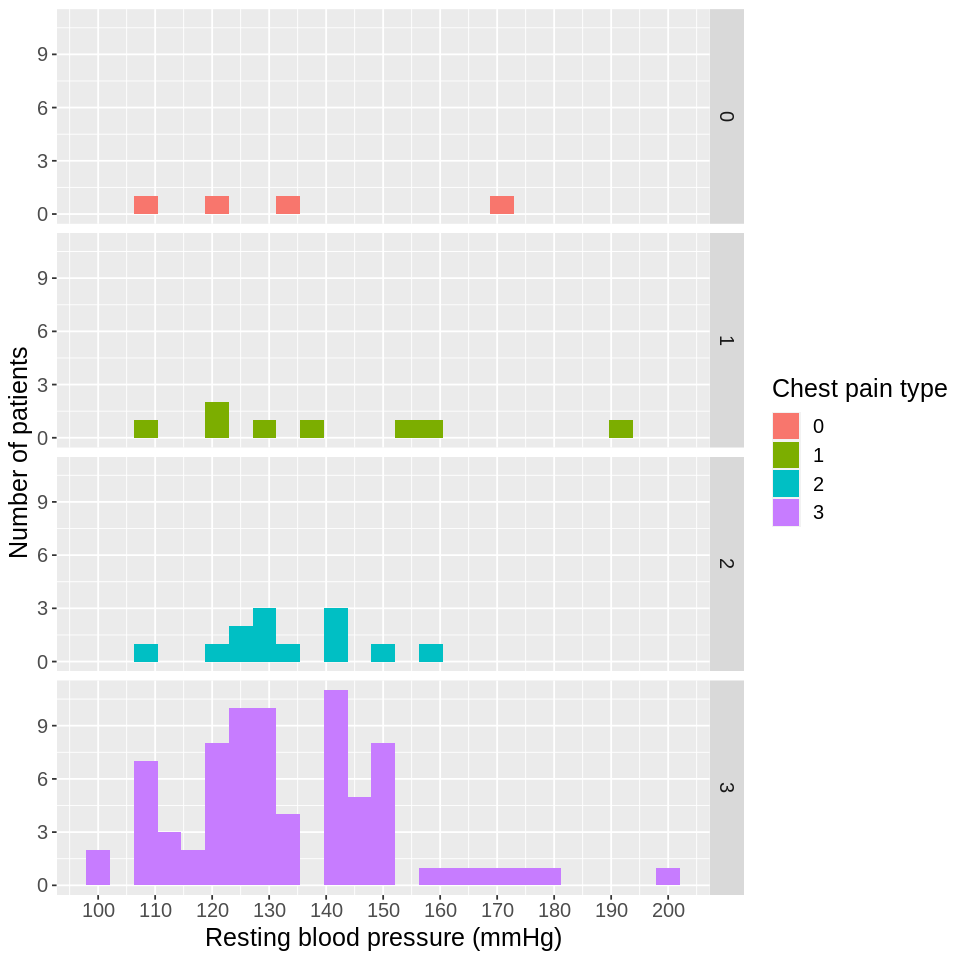

In [23]:
options(repr.plot.width = 8, repr.plot.height = 8) 
heart_train_cp_plot <- heart_train_cp |> ggplot(aes(x = trestbps, fill = cp)) +
                                        geom_histogram(bins = 25) +
                                        labs(x = "Resting blood pressure (mmHg)", y = "Number of patients", fill = "Chest pain type") +
                                        facet_grid(rows = vars(cp)) +
                                        theme(text = element_text(size = 15)) +
                                        scale_x_continuous(breaks = seq(90, 200, by = 10))
heart_train_cp_plot

From the histograms, we see that most of the patients with chest pain type 2 and 3 have a resting blood pressure between 110 and 150 mmHg. Patients with type 1 chest pain are mainly populated in a smaller range, from slightly below 120 mmHg to 140 mmHg. Patients with type 0 chest pain are equally distributed over a wide range of blood pressure from 110 mmHg to 180 mmHg. In general, most patients with chest pain of any kind have resting blood pressure in the range from 110 to 150 mmHg. We can then expect that our predicted chest pain type to fall into that range as well.

### METHOD

(The rest of the methods go here)

### EXPECTED OUTCOME AND SIGNIFICANCE

(The rest of this section go here)

### REFERENCE